In [6]:
import pkg_resources
# pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
# path = '/Users/xingyuchen0810/Downloads/text_mining/project-port/data/tweets/'

# file_names = ['tiktok_tweets_1.csv', 'tiktok_tweets_2.csv', 'tiktok_tweets_3.csv','tiktok_tweets_4.csv', 'tiktok_tweets_5.csv', 'tiktok_tweets_6.csv', 'tiktok_tweets_7.csv']
# dataframes = []
# for file in file_names:
#     dataframes.append(pd.read_csv(path + file))

# merged_df = pd.concat(dataframes, ignore_index=True)


In [11]:
# merged_df.to_csv('tiktoktweets.csv')

In [12]:
df = pd.read_csv('tiktoktweets.csv')

In [13]:
df.head()

,text
0,SeLliNG 22.500 FoLlowERS insTagRAm accoUnt...\...
1,Check out eltippytoezz's video! #TikTok https:...
2,I can bet my last dollar that Beyoncé is gonna...
3,I'm active Inbox me now !! for Any Account Rec...
4,The Restrict Act (TikTok Bill): Another Trojan...


In [14]:
new_df = df[df['text'].apply(lambda x: len(x) > 30) & df['text'].apply(lambda x: len(x) < 100)]
new_df

,text
1,Check out eltippytoezz's video! #TikTok https:...
5,Check out El Podcast Media's video! #TikTok ht...
6,I refuse to ever get a tiktok account lol
7,@f4ngrunin Post it on tiktok and you’re starti...
8,😭😭😭 what’s my man xhaka doing on tiktok live h...
...,...
7241,@cactus_bryce @HawleyMO From TikTok accessing ...
7246,Check out Col. Pam for Attorney General's vide...
7247,"Hawley, Paul clash on floor over TikTok ban ht..."
7248,that one simp boy personality that derives fro...


In [15]:
new_df = new_df[new_df['text'].notnull()]
new_df

,text
1,Check out eltippytoezz's video! #TikTok https:...
5,Check out El Podcast Media's video! #TikTok ht...
6,I refuse to ever get a tiktok account lol
7,@f4ngrunin Post it on tiktok and you’re starti...
8,😭😭😭 what’s my man xhaka doing on tiktok live h...
...,...
7241,@cactus_bryce @HawleyMO From TikTok accessing ...
7246,Check out Col. Pam for Attorney General's vide...
7247,"Hawley, Paul clash on floor over TikTok ban ht..."
7248,that one simp boy personality that derives fro...


In [17]:
nlp = spacy.load("en_core_web_sm")
# lower case
new_df['text'] = new_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
new_df

,text
1,check out eltippytoezz's video! #tiktok https:...
5,check out el podcast media's video! #tiktok ht...
6,i refuse to ever get a tiktok account lol
7,@f4ngrunin post it on tiktok and you’re starti...
8,😭😭😭 what’s my man xhaka doing on tiktok live h...
...,...
7241,@cactus_bryce @hawleymo from tiktok accessing ...
7246,check out col. pam for attorney general's vide...
7247,"hawley, paul clash on floor over tiktok ban ht..."
7248,that one simp boy personality that derives fro...


In [19]:
# remove punctuation
new_df['text'] = new_df['text'].str.replace('[^\w\s]','')
new_df

<>:2: DeprecationWarning: invalid escape sequence '\w'
<>:2: DeprecationWarning: invalid escape sequence '\w'
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_14721/1362956404.py:2: DeprecationWarning: invalid escape sequence '\w'
  new_df['text'] = new_df['text'].str.replace('[^\w\s]','')
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_14721/1362956404.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['text'] = new_df['text'].str.replace('[^\w\s]','')


,text
1,check out eltippytoezzs video tiktok httpstcoy...
5,check out el podcast medias video tiktok https...
6,i refuse to ever get a tiktok account lol
7,f4ngrunin post it on tiktok and youre starting...
8,whats my man xhaka doing on tiktok live https...
...,...
7241,cactus_bryce hawleymo from tiktok accessing ou...
7246,check out col pam for attorney generals video ...
7247,hawley paul clash on floor over tiktok ban htt...
7248,that one simp boy personality that derives fro...


In [20]:
# remove numerical values
new_df['text'] = new_df['text'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))
new_df

,text
1,check out eltippytoezzs video tiktok httpstcoy...
5,check out el podcast medias video tiktok
6,i refuse to ever get a tiktok account lol
7,post it on tiktok and youre starting a new mak...
8,whats my man xhaka doing on tiktok live
...,...
7241,hawleymo from tiktok accessing our home wifi t...
7246,check out col pam for attorney generals video ...
7247,hawley paul clash on floor over tiktok ban
7248,that one simp boy personality that derives fro...


In [22]:
# remove stopwords
stop = stopwords.words('english')
new_df['text'] = new_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_df

,text
1,check eltippytoezzs video tiktok httpstcoyivkm...
5,check el podcast medias video tiktok
6,refuse ever get tiktok account lol
7,post tiktok youre starting new makeup trend
8,whats man xhaka tiktok live
...,...
7241,hawleymo tiktok accessing home wifi nerve
7246,check col pam attorney generals video tiktok h...
7247,hawley paul clash floor tiktok ban
7248,one simp boy personality derives tiktok drives...


In [23]:
# remove non-english words
new_df['text'] = new_df[new_df['text'].map(lambda x: x.isascii())]

In [31]:
new_df.to_csv('tem_tok.csv')

In [28]:
new_df = new_df[new_df['text'].apply(lambda x: len(str(x)) > 30)]
new_df

,text
1,check eltippytoezzs video tiktok httpstcoyivkm...
5,check el podcast medias video tiktok
6,refuse ever get tiktok account lol
7,post tiktok youre starting new makeup trend
11,vadoff wouldve thrown away investing tiktok x ...
...,...
7241,hawleymo tiktok accessing home wifi nerve
7246,check col pam attorney generals video tiktok h...
7247,hawley paul clash floor tiktok ban
7248,one simp boy personality derives tiktok drives...


In [30]:
# lemmatization using Spacy
from tqdm import tqdm
tqdm.pandas()
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
new_df['text'] = new_df['text'].progress_apply(space)
new_df

100%|██████████| 2300/2300 [00:07<00:00, 310.97it/s]
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_14721/2028273183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].progress_apply(space)


,text
1,check eltippytoezzs video tiktok httpstcoyivkm...
5,check el podcast medias video tiktok
6,refuse ever get tiktok account lol
7,post tiktok you re start new makeup trend
11,vadoff would ve throw away invest tiktok x app...
...,...
7241,hawleymo tiktok access home wifi nerve
7246,check col pam attorney general video tiktok ht...
7247,hawley paul clash floor tiktok ban
7248,one simp boy personality derive tiktok drive f...


In [32]:

arm_df = new_df['text'].str.split(expand=True)
arm_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,check,eltippytoezzs,video,tiktok,httpstcoyivkmusgjx,None,None,None,None,None,None,None,None,None,None,None,None
5,check,el,podcast,medias,video,tiktok,None,None,None,None,None,None,None,None,None,None,None
6,refuse,ever,get,tiktok,account,lol,None,None,None,None,None,None,None,None,None,None,None
7,post,tiktok,you,re,start,new,makeup,trend,None,None,None,None,None,None,None,None,None
11,vadoff,would,ve,throw,away,invest,tiktok,x,app,bro,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,hawleymo,tiktok,access,home,wifi,nerve,None,None,None,None,None,None,None,None,None,None,None
7246,check,col,pam,attorney,general,video,tiktok,httpstcoemrojsokko,None,None,None,None,None,None,None,None,None
7247,hawley,paul,clash,floor,tiktok,ban,None,None,None,None,None,None,None,None,None,None,None
7248,one,simp,boy,personality,derive,tiktok,drive,fuck,crazy,None,None,None,None,None,None,None,None


In [33]:
arm_df = arm_df.reset_index(drop=True)
# arm_df = arm_df.drop(['index'], axis = 1)
arm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,check,eltippytoezzs,video,tiktok,httpstcoyivkmusgjx,None,None,None,None,None,None,None,None,None,None,None,None
1,check,el,podcast,medias,video,tiktok,None,None,None,None,None,None,None,None,None,None,None
2,refuse,ever,get,tiktok,account,lol,None,None,None,None,None,None,None,None,None,None,None
3,post,tiktok,you,re,start,new,makeup,trend,None,None,None,None,None,None,None,None,None
4,vadoff,would,ve,throw,away,invest,tiktok,x,app,bro,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,hawleymo,tiktok,access,home,wifi,nerve,None,None,None,None,None,None,None,None,None,None,None
2296,check,col,pam,attorney,general,video,tiktok,httpstcoemrojsokko,None,None,None,None,None,None,None,None,None
2297,hawley,paul,clash,floor,tiktok,ban,None,None,None,None,None,None,None,None,None,None,None
2298,one,simp,boy,personality,derive,tiktok,drive,fuck,crazy,None,None,None,None,None,None,None,None


In [34]:

arm_df.to_csv('new_arm_for_r.csv')

In [51]:
HeadlineLIST= new_df['text']
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english"
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list
print(list(vocab)[10:20])


MyDTM = MyDTM.toarray()  # convert to a regular array
print(type(MyDTM))

ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
# MyDTM_DF.drop('tiktok', axis=1, inplace=True)
print(MyDTM_DF)

num_topics = 7

lda_model_DH = LatentDirichletAllocation(n_components=num_topics,
                                         max_iter=20, learning_method='online', verbose=True)
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)


['ability', 'able', 'abolish', 'abortion', 'absolutely', 'abt', 'abus', 'academys', 'acc', 'access']
<class 'numpy.ndarray'>
      aaaaaaaaaaaaaaaaa  aaaliyahparker  aaliyahjay  aap  aaron  aaronnarraph  \
0                     0               0           0    0      0             0   
1                     0               0           0    0      0             0   
2                     0               0           0    0      0             0   
3                     0               0           0    0      0             0   
4                     0               0           0    0      0             0   
...                 ...             ...         ...  ...    ...           ...   
2295                  0               0           0    0      0             0   
2296                  0               0           0    0      0             0   
2297                  0               0           0    0      0             0   
2298                  0               0           0    0      0  

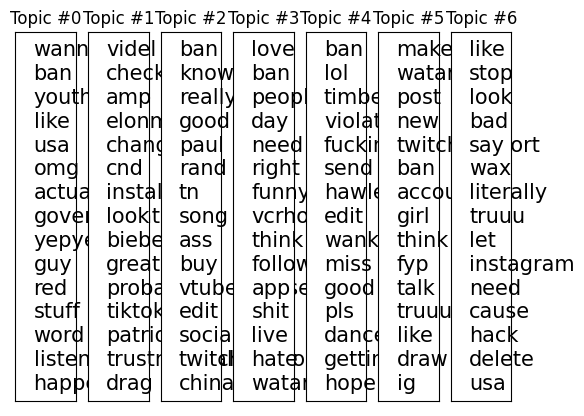

In [49]:
# LDA1
fontsize_base = 15
fig = plt.figure()
for t in range(num_topics):

    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
        ##fontsize_base*share)

mpld3.save_html(fig,'lda1.html')

In [52]:
# LDA2
pyLDAvis.enable_notebook() ## not using notebook

dtm = np.matrix(MyDTM)
panel = LDAvis.prepare(lda_model_DH, dtm, MyCountV, mds='tsne')

pyLDAvis.save_html(panel, "lda2.html")

/opt/homebrew/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [53]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=100
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [55]:
DF_Count.to_csv('new_cluster_for_r.csv')